In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split

/Users/yunhongmin/.pyenv/versions/3.7.4/envs/data-science/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/yunhongmin/.pyenv/versions/3.7.4/envs/data-science/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


[[58.36039191 14.92059243 26.61095777]
 [94.01725152 64.72471246  3.76334133]
 [25.85938291  8.59540609  9.01929563]
 [15.07719888 11.54934429 42.81371949]
 [21.40496315 11.2938701  15.5871729 ]]
[[56 18 27]
 [81 57  3]
 [25  9 11]
 [20 13 30]
 [27 13 13]]
Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


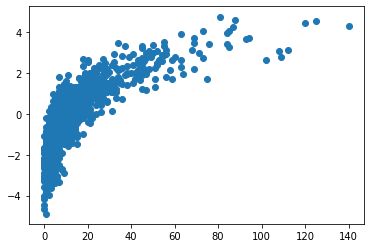

In [2]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
print((10 * np.exp(X_org))[:5, :])
print(X[:5, :])
y = np.dot(X_org, w)
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))
plt.scatter(X[:, 0], y)

Text(0.5, 0, 'value')

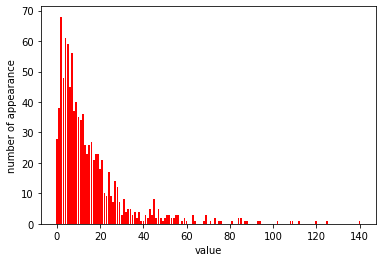

In [3]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)) ,bins, color='r')
plt.ylabel("number of appearance")
plt.xlabel("value")

In [4]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


(array([19.,  0.,  0., 31.,  0., 56.,  0., 37., 41., 44., 67., 29., 82.,
        50., 60., 65., 48., 32., 23., 21., 19.,  7.,  7.,  8.,  4.]),
 array([0.        , 0.19183162, 0.38366324, 0.57549487, 0.76732649,
        0.95915811, 1.15098973, 1.34282135, 1.53465297, 1.7264846 ,
        1.91831622, 2.11014784, 2.30197946, 2.49381108, 2.68564271,
        2.87747433, 3.06930595, 3.26113757, 3.45296919, 3.64480081,
        3.83663244, 4.02846406, 4.22029568, 4.4121273 , 4.60395892,
        4.79579055]),
 <a list of 25 Patch objects>)

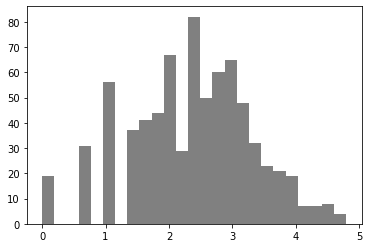

In [5]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
plt.hist(X_train_log[:, 0], bins=25, color='gray')

In [6]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875
